# <font color='magenta'>Welcome</font> to the <font color='green'>BoloCalc</font><font color='blue'>+</font> simulation workbook for the <font color='orange'>CMB-S4 Collaboration</font>!

### Author: Alec Hryciuk 
### University of Chicago Graduate Student
### Contact: <u><font color='blue'>hryciuk@uchicago.edu</font></u>

### Press <strong><font color='green'>Shift-Enter</font></strong> to <b>evaluate</b> all the cells in a decending order or hit run all to generate the interface. <font color='orange'>Note:</font> This interface and it's modules need to be in the same directory as Bolocalc. If it is not then you may run into FileNotFound Errors when trying to run calcBolos simulations because the interface is searching in the wrong directory.


# <font color='green'>Import</font> necessary <font color='blue'>packages</font>:

---

## You must run the cell below to generate any of the interfaces later on!

### Here we just need to <font color='green'>import</font> the necessary <font color='blue'>python packages</font> for displaying the interface. You may need to change the directory in "sys.path.append()" to where you have dumped the project. 

### If you want the notebook to look nicer (no giant blocks of code), it was coded with a CodeFolder extension to the IPython Notebook. You should be able to enable it by going to the Nbextensions tab in the home directory of Jupyter and checking the box.

In [1]:
#Shift-Enter on this cell to import packages to kernel (Do first)
import ipywidgets as ipw
from ipywidgets import interact, interact_manual, Layout, Button, Box, HBox, VBox
import IPython.display as display
import sys, os
#sys.path.append('/home/ahryciuk/BoloCalc')
from BoloCalcConverters import TeleCamNames, AppendFiles, runCalcBolos
from N_ell_calculator import S4_noise
import numpy as np
#from ilc_modules import flatsky, misc, ilc
#from ilc_modules import foregrounds as fg
import pandas as pd
import json

global cwd
cwd = os.getcwd()

from IPython.display import HTML


#Add where the project path is on your system
#sys.path.append('Enter path here')

# <font color='green'>Save</font> Path to <font color='blue'>Experimental Directory</font>:

---

### Enter the path to the <font color='blue'>experimental directory</font> you want to simulate. <font color='green'>Click</font> 'Run Interact' to save the path for the coming code.

In [2]:
#Shift-Enter on this cell to input Experimental Path
def save_exp_path(Experiment_path):
    global exp_dir
    exp_dir = Experiment_path
    try:
        print('Path saved as ' + exp_dir)
        global telescope_names, camera_names
        telescope_names, camera_names = TeleCamNames.TeleCamNames(exp_dir)
        print('Your telescope names are:')
        print(telescope_names)
        print('with camera names:')
        print(camera_names)
    except:
        print('Are you sure you input a valid path?')
    return
def save_bolo_path(BoloCalc_path):
    global bolocalc_wd
    bolocalc_wd = BoloCalc_path
    print('The path to BoloCalc on this machine is')
    print(bolocalc_wd)
    return

interact_manual(save_exp_path, Experiment_path='')
interact_manual(save_bolo_path, BoloCalc_path='')

<function __main__.save_bolo_path>

## <font color='green'>Plot</font> Real <font color='blue'>Bandpasses</font>

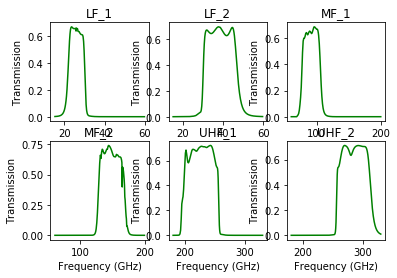

In [4]:
#Shift-Enter (twice for some reason) on this cell to plot Bandpasses
import os
os.chdir(cwd)
from PlotBands import PlotAllBands
import matplotlib.pyplot as plt

#exp_dir = '/mnt/c/Users/12622/Desktop/CMB_Research/S4/Noise_Modelling/BoloCalc_Simulations/V5/S4_baseline/CD/Real_Bands'

PlotAllBands(exp_dir, cwd)
plt.show()

# <font color='green'>Mainframe</font>

Ignoring ['cmb']


/home/ahryciuk/CMBS4_Noise_Modeling/ilc_modules/foregrounds.py:182: RuntimeWarning: invalid value encountered in true_divide
  cl_dg_po = dl_dg_po / dl_fac
/home/ahryciuk/CMBS4_Noise_Modeling/ilc_modules/foregrounds.py:183: RuntimeWarning: invalid value encountered in true_divide
  cl_dg_clus = dl_dg_clus / dl_fac
/home/ahryciuk/CMBS4_Noise_Modeling/ilc_modules/foregrounds.py:224: RuntimeWarning: invalid value encountered in true_divide
  cl_rg = dl_rg / dl_fac


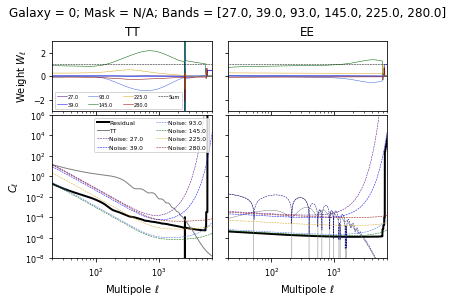

In [9]:
# Shift-Enter on this cell to generate Mainframe (Shift-Enter again to update)
from FrontEnd import FrontEnd
frontend = FrontEnd(exp_dir, cwd, bolocalc_wd)
total = frontend.gen_interface(exp_dir)
nl_int = frontend.gen_nl_interface()
cl_int = frontend.gen_cl_int()

titles = ['BoloCalc Mainframe','N_ell Spectra','C_ell Spectra','Fisher Analysis']
tab = ipw.Tab()
tab.children = [total,nl_int,cl_int]
for i in range(len(titles)):
    tab.set_title(i, titles[i])
tab

# Old Interface Below (Archived for now)

# <font color='green'>Run</font> a <font color='blue'>BoloCalc Simulation</font>:

---

### Here is where you will <font color='green'>run</font> a <font color='blue'>BoloCalc simulation</font> of the experiment you just entered.

### For details on how calcBolos runs simulations  <a href="https://github.com/chill90/BoloCalc/blob/master/MANUAL/BoloCalc_User_Manual.pdf"> click here</a>

In [3]:
#Run to Generate Simulation Interface



#Import simulation from Bolocalc to get value of status bar?
    
#Instantiate command classes
run_sim = runCalcBolos.runCalcBolos()
ap = AppendFiles.AppendFiles()

################################################################################# 
    
#Button Click Definitions:
def appfiles(a):
    try:
        ap.InputConvert(exp_dir)
    except NameError:
        print('Please Enter an Experimental Path')
    return
def appinput(a):
    try:
        ap.AppendInputs(exp_dir)
    except NameError:
        print('Please Enter an Experimental Path')
    return
def convout(a):
    try:
        ap.ConvertOutputFiles(exp_dir)
    except NameError:
        print('Please Enter an Experimental Path')
    return
def savefiles_in(a):
    try:
        a=0
        ap.SaveFiles(exp_dir, save_in_to.value, save_in_name.value, a)
    except NameError:
        print('Please Enter an Experimental Path')
    return
def savefiles_out(a):
    try:
        a=1
        ap.SaveFiles(exp_dir, save_out_to.value, save_out_name.value, a)
    except NameError:
        print('Please Enter an Experimental Path')
    return
def runsim(a):
    try:
        run_sim.runSim(exp_dir,cwd)
    except NameError:
        print('Enter a path to your experiment.')
    return
def saveplotparams(a):
    try:
        print('Saving plot parameters. Shift-Enter the next cell to display')
        os.chdir(exp_dir)# + '/' + 'OutputExcelFiles')
        plot_params_set = pd.read_excel('OutputExcelFiles.xlsx',sheet_name='N_ell_Plotting_Parameters')

        global plot_params_names
        global plot_params_values
        plot_params_names=[]
        plot_params_values=[]
        for i in range(len(plot_params_set)):
            plot_params_names.append(plot_params_set.iloc[i,0])
            plot_params_values.append(plot_params_set.iloc[i,1])

        for i in range(len(plot_params_values)):
            if type(plot_params_values[i]) is str:
                plot_params_values[i] = json.loads(plot_params_values[i])
        print('Done!')
    except NameError:
        print('Enter a path to your experiment.')
    return

################################################################################# 

#Title of this block of interface
title = ipw.HTML("<b><font size=6><font color='green'>Simulations!</font></b>")

#The button to run a simulation
run_bolocalc_layout = Layout(width='400px',height='100px')
run_bolocalc = ipw.Button(description = 'Run calcBolos', layout=run_bolocalc_layout, button_style='primary')
    
#Run Simulation button click definition:
#if a simulation has not been run---button click = run simulation
#if SimulationCheck.SimulationCheck.(exp_dir) == True:
#    run_bolocalc.on_click(runCalcBolos.runCalcBolos(exp_dir))
#else:
#    print('You have previously ran a simulation')
#    print('The output files will be overwritten')
#    print('If you still want to proceed click run calcBolos')
#    run_bolocalc.on_click(runCalcBolos.runCalcBolos(exp_dir))

#Text box display of current experimental directory
try:
    display_exp_path = ipw.Text(description = 'Current Experiment', value=exp_dir)
    
except NameError:
    display_exp_path = ipw.Text(description='Current Experiment',value='Null')
    print('Did you enter a path to your experiment?')
    
#Progress bar for viewing pleasure
sim_progress = ipw.IntProgress(value=0,
                               min=0,
                               max=100,
                               step=0.5,
                               description='Simulation Progress',
                               bar_style='success',
                               orientation='horizontal')

#sim_progress.value = Simulation._bar_len

#################################################################################

#Additional buttons
add_box_layout = Layout(display = 'flex',
                   flex_flow = 'column',
                    justify_content='space-between',
                    align_items = 'stretch',
                   border = 'solid',
                   width = '300px',
                    height = '75px')
append_input_button = ipw.Button(description='Convert Input Files to Excel',layout=add_box_layout)
append_input_button.style.button_color='green'
convert_output_button = ipw.Button(description='Convert Output files to Excel',layout=add_box_layout)
convert_output_button.style.button_color='orange'
save_output_button = ipw.Button(description='Overwrite the Input Files',layout=add_box_layout)
save_output_button.style.button_color='lightblue'
plots_button = ipw.Button(description='Save Plot Parameters From Excel',layout=add_box_layout)
plots_button.style.button_color='red'

#################################################################################

#save to path and name
save_layout = Layout(width = '200px',height='75px')
save_in_button = ipw.Button(description='Save Input Files',layout=save_layout, button_style='info')
save_out_button = ipw.Button(description='Save Output Files',layout=save_layout, button_style='info')
save_buttons = VBox([save_in_button,save_out_button])

save_in_to = ipw.Text(description='Save Input to:',placeholder='Path to save to')
save_in_name = ipw.Text(description='Input Directory Name:')
save_out_to = ipw.Text(description='Save Output to:',placeholder='Path to save to')
save_out_name = ipw.Text(description='Output Directory Name:')
save_to = VBox([save_in_to, save_in_name, save_out_to, save_out_name])

save_int = HBox([save_buttons, save_to])
save_int.layout.margin = '0 0 0 275px'

add_buttons = HBox([VBox([append_input_button,convert_output_button]),VBox([save_output_button,plots_button])])
add_buttons.layout.margin = '0 0 0 175px'

#################################################################################

#Button Click Execution Commands:
save_in_button.on_click(savefiles_in)
save_out_button.on_click(savefiles_out)
append_input_button.on_click(appfiles)
save_output_button.on_click(appinput)
convert_output_button.on_click(convout)
run_bolocalc.on_click(runsim)
plots_button.on_click(saveplotparams)

#################################################################################

#Formatting and Display
display_col = VBox([display_exp_path,sim_progress])

run_sim_row = HBox([run_bolocalc,display_col])
run_sim_row.layout.margin = '25px 0 0 150px'
total_layout=Layout(border='solid 15px blue')
total = VBox([title, run_sim_row, add_buttons, save_int],layout=total_layout,)
total.layout.margin = '0px 0px 0px 0px'
total



Saving plot parameters. Shift-Enter the next cell to display
Done!


# <font color='green'>Calculate and Plot</font>  <font color='blue'>N($\ell$)</font>:

---

### The interface displays the plotting parameters that you input when you clicked <font color = 'red'>'Save Plot Parameters from Excel'</font> above. The button at the bottom will <font color='green'>calculate</font> the N($\ell$) curves for <font color='blue'>temperature</font> and <font color='blue'>polarization</font>.  There is a <font color='green'>download</font> button in the bottom left corner of the generated plot interface so you can download the <font color='blue'>figures</font> you become attached to. There is also the ability to <font color='green'>zoom</font> in on parts of the plot and <font color='green'>pan</font> if you so desire it.

#### <font color='orange'>Note: If you change the values in the text boxes, you do</font> <font color='red'>NOT</font> <font color='orange'> change the parameters that go into calculating N($\ell$)</font>. Instead go back to the N_ell_Plotting_Parameters sheet in OutputExcelFiles.xlsx, make your changes and save, then <font color='green'>click</font> <font color='red'>'Save Plot Parameters from Excel'</font> again and <font color='green'>Shift-Enter</font> on this cell to update the calculator with your new values.

band centers:  [93.0, 145.0, 225.0, 280.0] [GHz]
beam sizes:  [2.2, 1.4, 1.0, 0.9] [arcmin]
sky area:  16501.18449976771 degrees^2
white noise level:  [7.991377559507103, 10.030146136141132, 22.32228368577403, 53.394902576371486] [uK-arcmin]


<IPython.core.display.Javascript object>


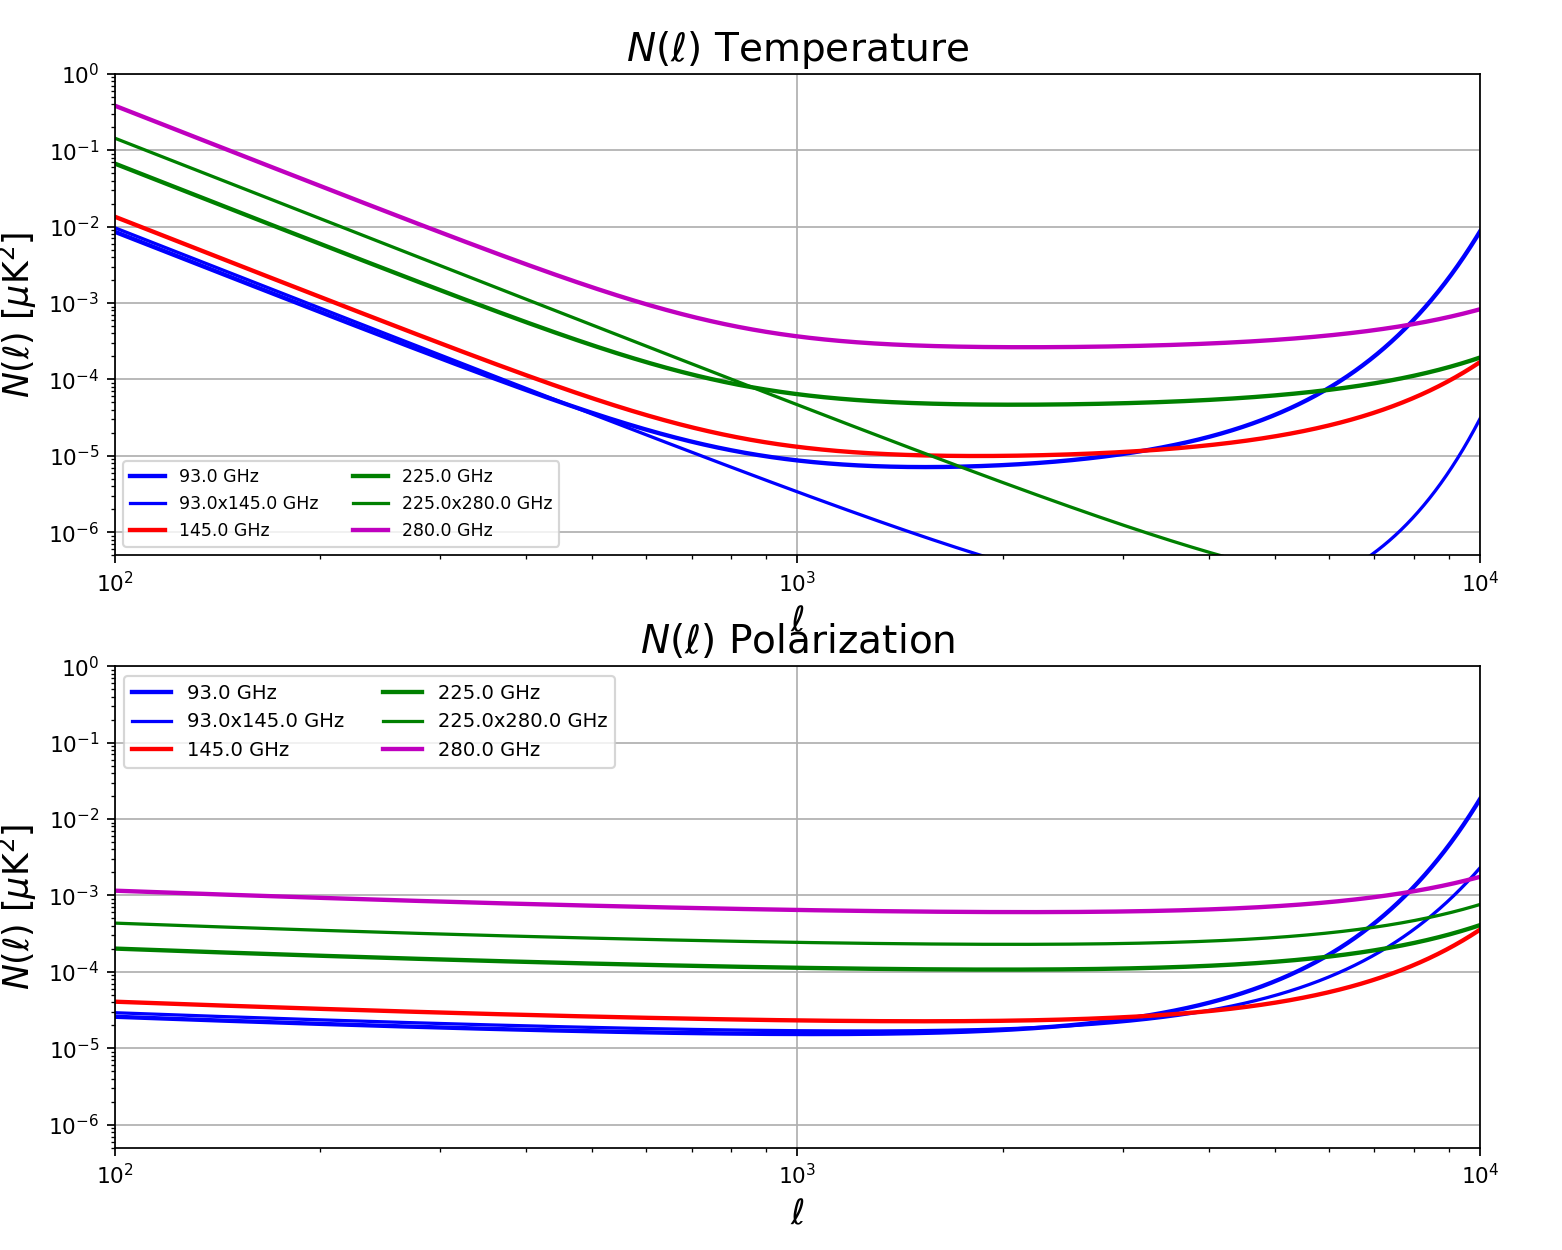

In [4]:
#Code for N(ell) interface

def N_ell_calculator(a):
    %matplotlib notebook
    import matplotlib.pyplot as plt
    import matplotlib as pltt
    import subprocess
    display.clear_output()

    global ell, N_ell_T_LA, N_ell_P_LA, Map_white_noise_levels
    ell, N_ell_T_LA, N_ell_P_LA, Map_white_noise_levels, corr_freq = S4_noise(band_centers=plot_params_values[0],
                                                              beam_sizes=plot_params_values[1],Sens=plot_params_values[15],
                                                              f_knees=plot_params_values[2],Cs=plot_params_values[3],
                                                              alpha_temp=plot_params_values[4],
                                                               survey_time=plot_params_values[5],f_sky=plot_params_values[6],
                                                               ret_after_obs_cuts=plot_params_values[7],
                                                               non_uniformity_param=plot_params_values[8],
                                                               ell_max=plot_params_values[9],ell_pivot=plot_params_values[10],
                                                               delta_ell=plot_params_values[11],
                                                               alpha_pol=plot_params_values[12],NTubes=plot_params_values[13],
                                                                  model_num=plot_params_values[14])


    global band_centers
    band_centers = plot_params_values[0]

    colors = ['b','r','g','m','k','y']

    fig, (plt1,plt2) = plt.subplots(2,1,figsize=(10,8))
    fig.tight_layout(pad=3.0)
    
    #TParr = ['T','P']
    for freq1 in band_centers:
        for freq2 in band_centers:

            if freq1 == freq2:
                i = band_centers.index(freq1)
                plt1.loglog(ell, N_ell_T_LA[(freq1,freq2)],label=str(band_centers[i])+' GHz', color=colors[i], ls='-', lw=2.)
            else:
                i = band_centers.index(freq1)
                j = band_centers.index(freq2)
                if freq2 is corr_freq[freq1] and freq2 > freq1:
                    plt1.loglog(ell, N_ell_T_LA[(freq1,freq2)],label=str(band_centers[i])+
                            'x'+str(band_centers[j]) + ' GHz', color=colors[i],lw=1.5)
                    
    #for i in range(0,len(band_centers)):
    #    plt1.loglog(ell,N_ell_T_LA[0][i], label=str(band_centers[i]) + ' GHz', color=colors[i], ls='-', lw=2.)
        #plt.loglog(ell,N_ell_V3_T_white[i], color=colors[i], ls='-', lw=0.5) #white noise


    # include correlated atmospheric noise across frequencies
    #plt1.loglog(ell, N_ell_T_LA[1][0], label=r'$27 \times 39$ GHz atm.', color='orange', lw=1.5)
    #plt1.loglog(ell, N_ell_T_LA[1][1], label=r'$93 \times 145$ GHz atm.', color='fuchsia', lw=1.5)
    #plt1.loglog(ell, N_ell_T_LA[1][2], label=r'$225 \times 280$ GHz atm.', color='springgreen', lw=1.5)
    plt1.set_title('$N(\ell$) Temperature', fontsize=18)
    plt1.set_ylabel('$N(\ell$) [$\mu$K${}^2$]', fontsize=16)
    plt1.set_xlabel('$\ell$', fontsize=16)
    plt1.set_ylim(5e-7,1)
    plt1.set_xlim(100,10000)
    plt1.legend(loc='lower left', ncol=2, fontsize=8)
    plt1.grid()
    #plt.savefig('V3_calc_mode'+str(mode)+'_fsky'+str(fsky)+'_defaultdist_noise_LAT_T.pdf')
    #plt.close()

    ## plot the polarization noise curves

    #for i in range(len(band_centers)):
    #   plt2.loglog(ell,N_ell_P_LA[0][i], label=str(band_centers[i])+' GHz (V3)', color=colors[i], ls='-', lw=2.)
        #plt.loglog(ell,N_ell_V3_T_white[i], color=colors[i], ls='-', lw=0.5) #white noise
    #    i+=1
    # include correlated atmospheric noise across frequencies
    
    for freq1 in band_centers:
        for freq2 in band_centers:
            
            if freq1 == freq2:
                i = band_centers.index(freq1)
                plt2.loglog(ell, N_ell_P_LA[(freq1,freq2)],label=str(band_centers[i])+' GHz', color=colors[i], ls='-', lw=2.)
    
            else:
                i = band_centers.index(freq1)
                j = band_centers.index(freq2)
                if freq2 is corr_freq[freq1] and freq2 > freq1:
                    plt2.loglog(ell, N_ell_P_LA[(freq1,freq2)],label=str(band_centers[i])+
                            'x'+str(band_centers[j]) + ' GHz', color=colors[i],lw=1.5)
                    
                    
    #plt2.loglog(ell, N_ell_P_LA[1][0], label=r'$27 \times 39$ GHz atm.', color='orange', lw=1.5)
    #plt2.loglog(ell, N_ell_P_LA[1][1], label=r'$93 \times 145$ GHz atm.', color='fuchsia', lw=1.5)
    #plt2.loglog(ell, N_ell_P_LA[1][2], label=r'$225 \times 280$ GHz atm.', color='springgreen', lw=1.5)
    plt2.set_title(r"$N(\ell$) Polarization", fontsize=18)
    plt2.set_ylabel(r"$N(\ell$) [$\mu$K${}^2$]", fontsize=16)
    plt2.set_xlabel(r"$\ell$", fontsize=16)
    plt2.set_ylim(5e-7,1)
    plt2.set_xlim(100,10000)
    plt2.legend(loc='upper left', ncol=2, fontsize=9)
    plt2.grid()

    return

#############Text Box inputs to calculation################

try:
    params = [0 for i in range(len(plot_params_names))]
    for i in range(len(plot_params_names)):
        params[i] = ipw.Text(description=plot_params_names[i],value=str(plot_params_values[i]))
except NameError:
    params = [0 for i in range(18)]
    for i in range(len(params)):
        params[i] = ipw.Text(description='')
    print('Save your plot parameters with the red button in the previous section')
    print('Then try Shift-Enter on this cell again.')
    
####################Display###############################

params_box1=HBox(params[0:3])
params_box2=HBox(params[3:6])
params_box3=HBox(params[6:9])
params_box4=HBox(params[9:12])
params_box5=HBox(params[12:15])
params_box6=HBox(params[15:])
params_box = VBox([params_box1,params_box2,params_box3,params_box4,params_box5,params_box6])

plot_layout = Layout(width='600px',height='100px')
plot_button = ipw.Button(description = 'Plot N(ell)', layout=plot_layout, button_style='danger')
plot_button.layout.margin = '0px 0px 0px 175px'
plot_button.on_click(N_ell_calculator)

##################Run Interact button#####################
plots = VBox([params_box,plot_button])

plots


    


## <font color='green'>Foreground Clean </font> <font color='blue'>Noise Spectra</font>:

---

Ignoring ['cmb']


/home/ahryciuk/CMBS4_Noise_Modeling/ilc_modules/foregrounds.py:182: RuntimeWarning: invalid value encountered in true_divide
  cl_dg_po = dl_dg_po / dl_fac
/home/ahryciuk/CMBS4_Noise_Modeling/ilc_modules/foregrounds.py:183: RuntimeWarning: invalid value encountered in true_divide
  cl_dg_clus = dl_dg_clus / dl_fac
/home/ahryciuk/CMBS4_Noise_Modeling/ilc_modules/foregrounds.py:224: RuntimeWarning: invalid value encountered in true_divide
  cl_rg = dl_rg / dl_fac


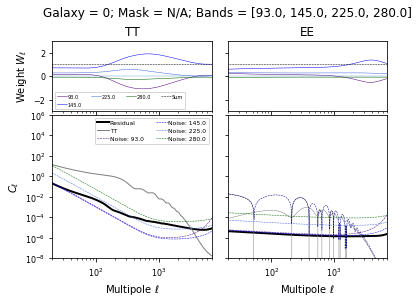

In [54]:
#Need to pass Nl's to make dictionary, make bl dictionary, ell array
from N_ell_calculator import package_beam_dic, package_nl_dic
os.chdir(cwd + '/ilc_modules')
import misc, ilc, flatsky, foregrounds as fg
os.chdir(cwd)
import matplotlib
%matplotlib inline



###############Interface###############################
#Interface
#params
paramfile = 'params.ini'
os.chdir(cwd + '/ilc_modules')
import plot_cls
from ConvertILC import convert_params_excel, append_params, calc_cls
param_dict = misc.fn_get_param_dict(paramfile)
os.chdir(cwd)


def convert_comp_sep(a):
    convert_params_excel(exp_dir,cwd)
    return
def app_comp_sep(a):
    append_params(exp_dir,cwd)
    return
def calc_cl_spec(a):
    
    #try:
    band_centers = plot_params_values[0]
    sensitivities = plot_params_values[15]
    beam_sizes = plot_params_values[1]
    ell_max = plot_params_values[9]
    nl_dic = {'T':N_ell_T_LA,'P':N_ell_P_LA}
    #nl_dic['T'][(145,93)] = nl_dic['T'][(93,145)]
    #nl_dic['T'][(280,225)] = nl_dic['T'][(225,280)]
    #nl_dic['P'][(145,93)] = nl_dic['P'][(93,145)]
    #nl_dic['P'][(280,225)] = nl_dic['P'][(225,280)]
    #bl_dic = package_beam_dic(white_noise_levels_T=sensitivities,
    #                          white_noise_levels_P=sensitivities,
    #                          band_centers = band_centers,
    #                         beam_sizes=beam_sizes,ellmax=ell_max)
    bl_dic = {}
    for freq in band_centers:
        i = band_centers.index(freq)
        bl_dic[freq] = misc.get_bl(beam_sizes[i],ell)
    
    global cl_residual
    el, cl_dic, weights_dic, cl_residual = calc_cls(nl_dic, bl_dic, ell, band_centers, cwd)
    
    
    
    plot_cls.plot_cls(param_dict, band_centers, el, cwd, cl_residual,weights_dic, nl_dic)
    #except NameError:
    #    print('Did you calculate the N_ell?')
    
    
    return


#Layout of buttons
calc_cl_layout = Layout(display = 'flex',
                   flex_flow = 'column',
                    justify_content='space-between',
                    align_items = 'stretch',
                   border = 'solid',
                   width = '600px',
                    height = '100px')
add_box_layout = Layout(display = 'flex',
                   flex_flow = 'column',
                    justify_content='space-between',
                    align_items = 'stretch',
                   border = 'solid',
                   width = '300px',
                    height = '75px')
convert_parameters = ipw.Button(description='Convert Comp Sep Params to Excel',layout=add_box_layout)
append_parameters = ipw.Button(description='Overwrite Comp Sep Text File',layout=add_box_layout)
append_parameters.style.button_color='lightblue'
convert_parameters.style.button_color='violet'

calc_cl = ipw.Button(description='Calculate Cl Component Spectra',layout=calc_cl_layout,button_style='primary')
calc_cl.style.button_color='green'

#Define clicking
convert_parameters.on_click(convert_comp_sep)
append_parameters.on_click(app_comp_sep)
calc_cl.on_click(calc_cl_spec)


param_buttons = HBox([convert_parameters,append_parameters])

total_cls = VBox([param_buttons,calc_cl])
total_cls.layout.margin = '0px 0px 0px 175px'
total_cls
#######################################################


# Fisher Forecast Tools (Under Construction)

In [6]:
%%html
<style>
.box_style_1{
    width:308px;
    height:auto;
    background-color:gray;
    border: 2px solid black;
}
.text_box_style_1{
    width:auto;
    height:auto;
    background-color:lightgray;
    border: 2px solid black;
}
.box_style_2{
    width:768px;
    height:auto;
    background-color:lightgray;
    border: 2px solid black;
}
</style>

In [7]:
#fisher calculation front end
os.chdir(cwd+'/ilc_modules')
import ConvertILC
import fisher
os.chdir(cwd)

#button click definitions
def convert_fisher(a):
    convert_fisher_params_excel(exp_dir,cwd)
    return
def append_fisher(a):
    append_fisher_params(exp_dir,cwd)
    return
def calc_fisher(a):
    
    try:
        #cl_residual check
        beam_sizes = plot_params_values[1]
        band_centers = plot_params_values[0]
        nl_dic = {'T':N_ell_T_LA,'P':N_ell_P_LA}

        if cl_residual is not None:
            fisher.fisher(paramfile_text.value,which_spectra_text.value,
                  None, cl_residual, band_centers, ell, fsky_text.value, 
                          cwd, beam_sizes,f3db_beams=dB_beams_text.value,
                          pct_unc_lpf=pct_unc_text.value)

        else:
            print('You need to generate the Foreground Cleaned Noise Spectra')
        #fisher(paramfile_text.value(),which_spectra_text.value(),
        #cl_residual,freq_bands,beam_sizes,dB_beams_text.value(),
        #pct_unc_text.value(),ell,fsky.value(),cwd)
        return
    except AssertionError:
        print('Please specify which_spectra you would like. Choose either unlensed_scalar or lensed_scalar')

add_box_layout = Layout(display = 'flex',
                   flex_flow = 'column',
                    justify_content='space-between',
                    align_items = 'stretch',
                   border = 'solid',
                   width = '300px',
                    height = '100px')

#button initialization
convert_params = ipw.Button(description='Convert Fisher Params to Excel',layout=add_box_layout)
append_params = ipw.Button(description='Append Fisher Params',layout=add_box_layout)
run_fisher_calc = ipw.Button(description='Calculate Fisher Matrix Elements',layout=Layout(width='600px',height='100px'),
                            button_style='primary')
convert_params.style.button_color='violet'
append_params.style.button_color='lightblue'
run_fisher_calc.style.button_color = 'green'

#click definitions
convert_params.on_click(convert_fisher)
append_params.on_click(append_fisher)
run_fisher_calc.on_click(calc_fisher)

#put buttons in boxes
fisher_buttons = VBox([convert_params,append_params])
fisher_buttons.layout.margin = '0px 0px 0px 125px'
run_fisher_calc.layout.margin = '5px 0px 0px 175px'
fisher_buttons.add_class("box_style_1")


#create text boxes for fisher parameters
##loop thru number of parameters

##########################################Beam Parameters####################################################
long_layout=Layout(width='375px')
freq_bands_text = ipw.Text(description='Frequency Bands', value=str(plot_params_values[0]),layout=long_layout)
beam_sizes_text = ipw.Text(description='Beam Sizes', value=str(plot_params_values[1]),layout=long_layout)
fsky_text = ipw.Text(description='fsky', value=str(plot_params_values[6]),layout=long_layout)
which_spectra_text = ipw.Text(description='which_spectra',
                              placeholder='choose from [unlensed_scalar,lensed_scalar]',layout=long_layout)
dB_beams_text = ipw.Text(description='3dB Point of Beams',layout=long_layout,value=str([150,150,150,150,150,150]))
pct_unc_text = ipw.Text(description='% Uncertainty Lowpass Filter',layout=long_layout,value=str(0.3))

################################systematics text boxes######################################################
NEI_list = ipw.Text(description='SQUID NEIs',value=str([1,1,1,1,1,1]),layout=long_layout)
S_resp_list = ipw.Text(description='Channel Responsivities',value="[1e6, 2e6, 3e6, 1e6, 1e6, 2e6]",layout=long_layout)
ell_knee_readout = ipw.Text(description='ell_knees',value=str([150,150,150,200,200,200]),layout=long_layout)
alpha_ind_readout = ipw.Text(description='Spectral Indices',value=str([2.2,2.2,2.2,2.2,2.2,2.2]),layout=long_layout)

ell_knee_atm = ipw.Text(description='ell_knees',value=str([150,150,150,200,200,200]),layout=long_layout)
alpha_ind_atm = ipw.Text(description='Spectral Indices',value=str([2.2,2.2,2.2,2.2,2.2,2.2]),layout=long_layout)
white_noise_level_atm = ipw.Text(description='White Noise Levels',value="[2e-5, 3e-5, 6e-6, 2e-6, 3e-4, 2e-4]",layout=long_layout)

ell_knee_det = ipw.Text(description='ell_knees',value=str([150,150,150,200,200,200]),layout=long_layout)
alpha_ind_det = ipw.Text(description='Spectral Indices',value=str([2.2,2.2,2.2,2.2,2.2,2.2]),layout=long_layout)
white_noise_level_det = ipw.Text(description='White Noise Levels',value="[2e-5, 3e-5, 6e-6, 2e-6, 3e-4, 2e-4]",layout=long_layout)

readout_box = VBox([ipw.Label("Readout Params:",layout=Layout(width="200px")),NEI_list,S_resp_list,ell_knee_readout,alpha_ind_readout])
readout_box.add_class("text_box_style_1")
atm_box = VBox([ipw.Label("Atmosphere Params:",layout=Layout(width="200px")),ell_knee_atm,alpha_ind_atm,white_noise_level_atm])
atm_box.add_class("text_box_style_1")
det_box = VBox([ipw.Label("Detector Params:",layout=Layout(width="200px")),ell_knee_det,alpha_ind_det,white_noise_level_det])
det_box.add_class("text_box_style_1")
syst_box = VBox([ipw.Label('Systematics Panel:',layout=Layout(width="200px")),HBox([readout_box,VBox([atm_box,det_box])])])
syst_box.add_class("box_style_2")
syst_box.layout.margin='0px 0px 0px 125px'

#############################################################################################################

#paramfile
paramfile_text = ipw.Text(description='Parameter File',
                          value=cwd + '/ilc_modules/params_planck_r_0.0_2015_cosmo_lensed_LSS_JM.txt',
                          layout=Layout(width='750px'))
paramfile_text.layout.margin = '0px 0px 0px 100px'

#organize into boxes
text_box = VBox([which_spectra_text,freq_bands_text,beam_sizes_text,fsky_text,dB_beams_text,pct_unc_text])
text_box.layout.margin = '0px 0px 0px 0px'
text_box.add_class("text_box_style_1")

#style

fisher_Box = HBox([fisher_buttons,text_box])
fisher_Box.layout.margin = '5px 0px 0px 0px'
fisher_Box = VBox([paramfile_text,fisher_Box,syst_box,run_fisher_calc])
fisher_Box.add_class("text_box_style_1")
fisher_Box

Please specify which_spectra you would like. Choose either unlensed_scalar or lensed_scalar


# Tabbed Interface (Under Construction)

In [10]:
titles = ['BoloCalc Mainframe','N_ell Spectra','C_ell Spectra','Fisher Analysis']
tab = ipw.Tab()
tab.children = [total,plots,total_cls,fisher_Box]
for i in range(len(titles)):
    tab.set_title(i, titles[i])
tab


	get experiment specs and nl

	get/read fiducual LCDM power spectra computed using CAMB

	get/read derivatives

	get delta Cl

	get fisher

	fixing paramaters, if need be

	adding prior

	get covariance matrix

	extract sigma(neff)

		\simga(neff) = 0.0438 using observables = ['TT', 'EE', 'TE']; fsky = 0.4; power spectra = unlensed_scalar



# Quick Fisher Calculations

In [59]:
#no systematics
import os
os.chdir('/home/ahryciuk/BoloCalc/ilc_modules')
from fisher import fisher
os.chdir('/home/ahryciuk/BoloCalc')

paramfile = '/home/ahryciuk/BoloCalc/ilc_modules/params_planck_r_0.0_2015_cosmo_lensed_LSS_JM.txt'
freq_bands = [93,145,225,280]
#fwhm_bands = [2.5,1.6,1.1,1.0]
fwhm_bands = [ 2.2, 1.4, 1.0, 0.9]

cosmo_index = 5099
TParr = ['T','P']
cl_residual_cosmo = {}
cl_residual_cosmo['TT'] = cl_residual['TT'][:cosmo_index]
cl_residual_cosmo['EE'] = cl_residual['EE'][:cosmo_index]
#cl_residual_cosmo['TE'] = cl_residual['TE'][20:cosmo_index]
ell_cosmo = ell[:cosmo_index]
fsky = 0.61

fisher(paramfile,'unlensed_scalar',None, cl_residual_cosmo, freq_bands, ell_cosmo, fsky, cwd, fwhm_bands=fwhm_bands,f3db_beams=[150,150,150,150],pct_unc_lpf=None)


	get experiment specs and nl

	get/read fiducual LCDM power spectra computed using CAMB

	get/read derivatives

	get delta Cl

	get fisher

	fixing paramaters, if need be

	adding prior

	get covariance matrix

	extract sigma(neff)

		\simga(neff) = 0.0382 using observables = ['TT', 'EE', 'TE']; fsky = 0.61; power spectra = unlensed_scalar



In [49]:
#systematics
import os
os.chdir('/home/ahryciuk/BoloCalc/ilc_modules')
from fisher import fisher
os.chdir('/home/ahryciuk/BoloCalc')

paramfile = '/home/ahryciuk/BoloCalc/ilc_modules/params_planck_r_0.0_2015_cosmo_lensed_LSS_JM.txt'
freq_bands = [93,145,225,280]
fwhm_bands = [2.5,1.6,1.1,1.0]
cosmo_index = 5099
TParr = ['T','P']
nl_dic_c = {}
for TP in TParr:
    nl_dic_c[TP] = {}
    for freq1 in freq_bands:
        for freq2 in freq_bands:
            if TP is 'T':
                nl_dic_c[TP][(freq1,freq2)] = N_ell_T_LA[(freq1,freq2)][:cosmo_index]
            elif TP is 'P':
                nl_dic_c[TP][(freq1,freq2)] = N_ell_P_LA[(freq1,freq2)][:cosmo_index]
            
fsky = 0.61


cl_residual_cosmo = {}
cl_residual_cosmo['TT'] = cl_residual['TT'][:cosmo_index]
cl_residual_cosmo['EE'] = cl_residual['EE'][:cosmo_index]
#cl_residual_cosmo['TE'] = cl_residual['TE'][20:cosmo_index]
ell_cosmo = ell[:cosmo_index]

fisher(paramfile,'lensed_scalar',None, cl_residual_cosmo, freq_bands, ell_cosmo, fsky, cwd, fwhm_bands=fwhm_bands,f3db_beams=[150,150,150,150],pct_unc_lpf=0.3)


	get experiment specs and nl

	get/read fiducual LCDM power spectra computed using CAMB

	get/read derivatives

	get delta Cl

	get fisher

	fixing paramaters, if need be

	adding prior

	get covariance matrix

	extract sigma(neff)

		\simga(neff) = 0.0403 using observables = ['TT', 'EE', 'TE']; fsky = 0.61; power spectra = lensed_scalar



# Time constant uncertainty as a Transfer Function on measured Spectra

Text(0,0.5,'Amplitude')

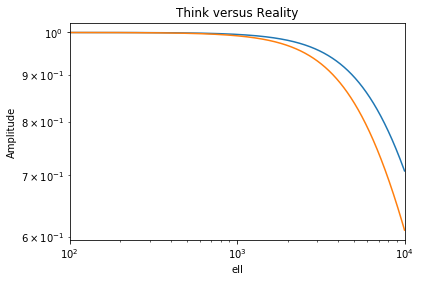

In [57]:
scan_sp = 1 #deg/s
tau_d = 10e-3 #s
tau_unc = 0.3 #30% uncertainty
import numpy as np

ell = np.arange(2,1e4,1)

TF_think = 1 / np.sqrt( 1 + (ell**2.*(scan_sp*tau_d)**2.)/1e4 )
TF_actual = 1 / np.sqrt( 1 + (ell**2.*(scan_sp*tau_d)**2.*(1+tau_unc)**2.)/1e4 )
TF_mag = np.sqrt(( 1 + ( ell**2.*(scan_sp*tau_d)**2.)/1e4 ) / ( 1 + ( ell**2.*(scan_sp*tau_d)**2.*(1+tau_unc)**2. )/1e4 ))

import matplotlib.pyplot as plt

#Transfer Functions
plt.loglog(ell,TF_think,ell,TF_actual)
plt.title('Think versus Reality')
plt.xlim(100,1e4)
plt.xlabel('ell')
plt.ylabel('Amplitude')

Text(0.5,1,'Residual Transfer Function')

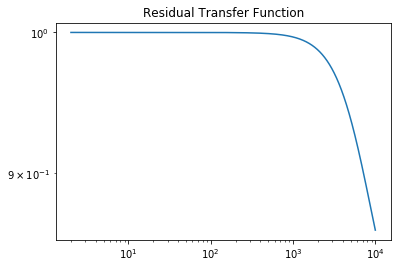

In [21]:
plt.loglog(ell,TF_mag)
plt.title('Residual Transfer Function')